<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Discovery/blob/main/classificationModelling_mol2vecFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mol2vec Feature Based Classification Modeling

## Introduction
Mol2vec is  a representation of molecular substructure. Embedding of substructures  is generated through unsupervised learning  and this vector representation of molecular substructure in a similar direction is combined to represent a compound. Mol2Vec is dense representation and shown to overcome sparseness and bit collison(Jaeger et al., 2018).


## Data loading and Preprocessing



In [ ]:
# For Reporducibility
import numpy as np
np.random.seed(42)


In [ ]:
# Tpot requires numpy==1.23.3 as of june 2024
!pip install numpy==1.23.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.3 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.3 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.3 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Primary dataset

In [ ]:
# Load dataset
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/StandarizationOfDataset/StandarizedSmiles_cutOFF800daltonMolecularweight (1).xlsx')
df.head(5)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


## Feature Generation
Acquisition of the primary molecular dataset of the human acetylcholinesterase inhibitor was done from ChEMBL database(ID:ChEMBL22).



In [ ]:
df.to_csv('inhibitor.csv', index=False)

In [ ]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 8.2 MB/s eta 0:00:00


The mol2vec featurizer from deepchem featurizer library was adopted, documentation can be found here(DeepChem, 2024):[(Source)](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html)

In [ ]:
import deepchem as dc
dataset_file = 'inhibitor.csv'
task = ['classLabel']
featurizer_func =dc.feat.Mol2VecFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset = loader.create_dataset(dataset_file)

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset)
dataset = transformer.transform(dataset)

In [ ]:
dataset

<DiskDataset X.shape: (4077, 300), y.shape: (4077, 1), w.shape: (4077, 1), task_names: ['classLabel']>

In [ ]:
pd_dataset=pd.DataFrame(dataset.X)
pd_dataset

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.743677,-2.617766,-1.463981,3.431902,-0.507706,-3.162838,-8.625934,0.561109,6.064406,2.796303,...,1.785627,9.653242,4.959260,-0.964806,-7.318800,-3.278967,-3.345074,-2.871823,-9.286590,-1.237994
1,-0.022401,-3.035324,-2.936454,4.014795,-1.889996,-1.846613,-9.081803,1.806637,6.578401,1.990197,...,-1.141308,10.744567,7.339191,-1.334266,-8.269178,-5.542325,-6.379291,-4.489344,-8.903658,-0.822479
2,-0.254038,-2.279178,-1.385821,1.094400,-1.095875,-1.559989,-7.215830,1.067882,4.685546,0.112746,...,-0.487899,8.504651,4.585428,-0.287166,-6.860514,-4.862276,-5.647535,-4.257296,-6.877133,-0.621089
3,3.646972,-2.727440,-1.909982,4.749797,-0.699328,0.766371,-7.259448,0.287479,2.591937,1.431683,...,0.780774,7.682249,4.367770,-1.706843,-5.331459,-2.277675,-4.638800,-1.308961,-6.669551,-0.876665
4,2.932416,-3.255054,-1.578064,3.210784,0.631724,3.134247,-13.800772,0.204165,4.222795,-0.113157,...,0.810746,10.374796,9.471412,-1.741442,-9.092550,-2.636696,-5.292384,-7.313922,-9.992536,-4.094881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,4.743312,-4.984807,-5.035522,5.397807,0.107947,1.070009,-14.466059,-0.542539,7.025784,7.834800,...,-1.792139,13.545056,12.438290,0.482161,-12.307568,-3.143213,-6.494977,-4.709651,-13.571205,-1.969695
4073,1.416885,-2.601567,-2.787278,6.947593,-2.074272,-1.950662,-10.530160,1.185373,9.830079,6.405202,...,0.141609,7.011363,8.381334,-1.261080,-6.588765,-1.920031,-2.798092,-3.808120,-8.890847,1.934523
4074,1.055186,-2.319237,-2.329283,8.239504,0.778263,0.594359,-8.966866,-2.087396,7.616791,5.214264,...,0.949572,6.020693,8.732210,-1.525846,-3.408405,-2.544440,-2.721874,-2.342903,-7.440706,1.002012
4075,0.558703,-2.733050,-2.889769,8.428326,1.031934,-0.128592,-9.066122,-1.898154,8.091727,5.392752,...,1.212185,6.595780,8.759344,-1.168487,-3.449260,-3.229773,-3.093554,-2.743265,-7.684652,1.305840


In [ ]:
import pandas as pd
# Create a dictionary to map old column names to new column names
column_rename_map = {old_column: f"fp_{old_column}" for old_column in pd_dataset.columns}

# Rename the columns
pd_dataset.rename(columns=column_rename_map, inplace=True)

In [ ]:
pd_dataset

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_290,fp_291,fp_292,fp_293,fp_294,fp_295,fp_296,fp_297,fp_298,fp_299
0,0.743677,-2.617766,-1.463981,3.431902,-0.507706,-3.162838,-8.625934,0.561109,6.064406,2.796303,...,1.785627,9.653242,4.959260,-0.964806,-7.318800,-3.278967,-3.345074,-2.871823,-9.286590,-1.237994
1,-0.022401,-3.035324,-2.936454,4.014795,-1.889996,-1.846613,-9.081803,1.806637,6.578401,1.990197,...,-1.141308,10.744567,7.339191,-1.334266,-8.269178,-5.542325,-6.379291,-4.489344,-8.903658,-0.822479
2,-0.254038,-2.279178,-1.385821,1.094400,-1.095875,-1.559989,-7.215830,1.067882,4.685546,0.112746,...,-0.487899,8.504651,4.585428,-0.287166,-6.860514,-4.862276,-5.647535,-4.257296,-6.877133,-0.621089
3,3.646972,-2.727440,-1.909982,4.749797,-0.699328,0.766371,-7.259448,0.287479,2.591937,1.431683,...,0.780774,7.682249,4.367770,-1.706843,-5.331459,-2.277675,-4.638800,-1.308961,-6.669551,-0.876665
4,2.932416,-3.255054,-1.578064,3.210784,0.631724,3.134247,-13.800772,0.204165,4.222795,-0.113157,...,0.810746,10.374796,9.471412,-1.741442,-9.092550,-2.636696,-5.292384,-7.313922,-9.992536,-4.094881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,4.743312,-4.984807,-5.035522,5.397807,0.107947,1.070009,-14.466059,-0.542539,7.025784,7.834800,...,-1.792139,13.545056,12.438290,0.482161,-12.307568,-3.143213,-6.494977,-4.709651,-13.571205,-1.969695
4073,1.416885,-2.601567,-2.787278,6.947593,-2.074272,-1.950662,-10.530160,1.185373,9.830079,6.405202,...,0.141609,7.011363,8.381334,-1.261080,-6.588765,-1.920031,-2.798092,-3.808120,-8.890847,1.934523
4074,1.055186,-2.319237,-2.329283,8.239504,0.778263,0.594359,-8.966866,-2.087396,7.616791,5.214264,...,0.949572,6.020693,8.732210,-1.525846,-3.408405,-2.544440,-2.721874,-2.342903,-7.440706,1.002012
4075,0.558703,-2.733050,-2.889769,8.428326,1.031934,-0.128592,-9.066122,-1.898154,8.091727,5.392752,...,1.212185,6.595780,8.759344,-1.168487,-3.449260,-3.229773,-3.093554,-2.743265,-7.684652,1.305840


In [ ]:
df = pd.concat([df, pd_dataset.loc[:, 'fp_0':]], axis=1)
df

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,fp_290,fp_291,fp_292,fp_293,fp_294,fp_295,fp_296,fp_297,fp_298,fp_299
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,1.785627,9.653242,4.959260,-0.964806,-7.318800,-3.278967,-3.345074,-2.871823,-9.286590,-1.237994
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,-1.141308,10.744567,7.339191,-1.334266,-8.269178,-5.542325,-6.379291,-4.489344,-8.903658,-0.822479
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,-0.487899,8.504651,4.585428,-0.287166,-6.860514,-4.862276,-5.647535,-4.257296,-6.877133,-0.621089
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,0.780774,7.682249,4.367770,-1.706843,-5.331459,-2.277675,-4.638800,-1.308961,-6.669551,-0.876665
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,0.810746,10.374796,9.471412,-1.741442,-9.092550,-2.636696,-5.292384,-7.313922,-9.992536,-4.094881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,-1.792139,13.545056,12.438290,0.482161,-12.307568,-3.143213,-6.494977,-4.709651,-13.571205,-1.969695
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,0.141609,7.011363,8.381334,-1.261080,-6.588765,-1.920031,-2.798092,-3.808120,-8.890847,1.934523
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,0.949572,6.020693,8.732210,-1.525846,-3.408405,-2.544440,-2.721874,-2.342903,-7.440706,1.002012
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,1.212185,6.595780,8.759344,-1.168487,-3.449260,-3.229773,-3.093554,-2.743265,-7.684652,1.305840


In [ ]:
# Installing RDKit from PyPI
!pip install rdkit-pypi

In [ ]:
# Drop any feature containing null values
df.dropna(axis=1)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,fp_290,fp_291,fp_292,fp_293,fp_294,fp_295,fp_296,fp_297,fp_298,fp_299
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,1.785627,9.653242,4.959260,-0.964806,-7.318800,-3.278967,-3.345074,-2.871823,-9.286590,-1.237994
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,-1.141308,10.744567,7.339191,-1.334266,-8.269178,-5.542325,-6.379291,-4.489344,-8.903658,-0.822479
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,-0.487899,8.504651,4.585428,-0.287166,-6.860514,-4.862276,-5.647535,-4.257296,-6.877133,-0.621089
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,0.780774,7.682249,4.367770,-1.706843,-5.331459,-2.277675,-4.638800,-1.308961,-6.669551,-0.876665
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,0.810746,10.374796,9.471412,-1.741442,-9.092550,-2.636696,-5.292384,-7.313922,-9.992536,-4.094881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,-1.792139,13.545056,12.438290,0.482161,-12.307568,-3.143213,-6.494977,-4.709651,-13.571205,-1.969695
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,0.141609,7.011363,8.381334,-1.261080,-6.588765,-1.920031,-2.798092,-3.808120,-8.890847,1.934523
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,0.949572,6.020693,8.732210,-1.525846,-3.408405,-2.544440,-2.721874,-2.342903,-7.440706,1.002012
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,1.212185,6.595780,8.759344,-1.168487,-3.449260,-3.229773,-3.093554,-2.743265,-7.684652,1.305840


In [ ]:
feature1=pd_dataset.loc[:, 'fp_0':]

In [ ]:
feature1

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_290,fp_291,fp_292,fp_293,fp_294,fp_295,fp_296,fp_297,fp_298,fp_299
0,0.743677,-2.617766,-1.463981,3.431902,-0.507706,-3.162838,-8.625934,0.561109,6.064406,2.796303,...,1.785627,9.653242,4.959260,-0.964806,-7.318800,-3.278967,-3.345074,-2.871823,-9.286590,-1.237994
1,-0.022401,-3.035324,-2.936454,4.014795,-1.889996,-1.846613,-9.081803,1.806637,6.578401,1.990197,...,-1.141308,10.744567,7.339191,-1.334266,-8.269178,-5.542325,-6.379291,-4.489344,-8.903658,-0.822479
2,-0.254038,-2.279178,-1.385821,1.094400,-1.095875,-1.559989,-7.215830,1.067882,4.685546,0.112746,...,-0.487899,8.504651,4.585428,-0.287166,-6.860514,-4.862276,-5.647535,-4.257296,-6.877133,-0.621089
3,3.646972,-2.727440,-1.909982,4.749797,-0.699328,0.766371,-7.259448,0.287479,2.591937,1.431683,...,0.780774,7.682249,4.367770,-1.706843,-5.331459,-2.277675,-4.638800,-1.308961,-6.669551,-0.876665
4,2.932416,-3.255054,-1.578064,3.210784,0.631724,3.134247,-13.800772,0.204165,4.222795,-0.113157,...,0.810746,10.374796,9.471412,-1.741442,-9.092550,-2.636696,-5.292384,-7.313922,-9.992536,-4.094881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,4.743312,-4.984807,-5.035522,5.397807,0.107947,1.070009,-14.466059,-0.542539,7.025784,7.834800,...,-1.792139,13.545056,12.438290,0.482161,-12.307568,-3.143213,-6.494977,-4.709651,-13.571205,-1.969695
4073,1.416885,-2.601567,-2.787278,6.947593,-2.074272,-1.950662,-10.530160,1.185373,9.830079,6.405202,...,0.141609,7.011363,8.381334,-1.261080,-6.588765,-1.920031,-2.798092,-3.808120,-8.890847,1.934523
4074,1.055186,-2.319237,-2.329283,8.239504,0.778263,0.594359,-8.966866,-2.087396,7.616791,5.214264,...,0.949572,6.020693,8.732210,-1.525846,-3.408405,-2.544440,-2.721874,-2.342903,-7.440706,1.002012
4075,0.558703,-2.733050,-2.889769,8.428326,1.031934,-0.128592,-9.066122,-1.898154,8.091727,5.392752,...,1.212185,6.595780,8.759344,-1.168487,-3.449260,-3.229773,-3.093554,-2.743265,-7.684652,1.305840


In [ ]:
target=df['classLabel']
target

0       1
1       1
2       0
3       1
4       1
       ..
4072    1
4073    0
4074    0
4075    1
4076    1
Name: classLabel, Length: 4077, dtype: int64

## AutoML Modeling


In [ ]:
!pip install tpot

In [ ]:
# Import necessary libraries
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix,
    classification_report, precision_score, recall_score, f1_score,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.20, random_state=42)
# Create an instance of TPOTClassifier with five fold cross validation
tpot = TPOTClassifier(generations=5, population_size=20, cv=5, random_state=42, verbosity=2)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)
# Get the best pipeline from TPOT
best_pipeline = tpot.fitted_pipeline_


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8350242862108814

Generation 2 - Current best internal CV score: 0.8362484615601424

Generation 3 - Current best internal CV score: 0.8393150067174627

Generation 4 - Current best internal CV score: 0.8393150067174627

Generation 5 - Current best internal CV score: 0.8393150067174627

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.8, min_samples_leaf=4, min_samples_split=9, n_estimators=100)


In [ ]:
joblib.dump(best_pipeline, 'best_pipeline_tpot_mol2vec.pkl')


['best_pipeline_tpot_mol2vec.pkl']

### Evaluation of AutoML Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (precision_score, recall_score, f1_score,
                             roc_auc_score, cohen_kappa_score,
                             matthews_corrcoef, accuracy_score)
from sklearn.model_selection import cross_val_score
import joblib

# Initialize a StandardScaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test data
y_test_pred = best_pipeline.predict(X_test_scaled)

# Calculate evaluation metrics
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_test_pred)
cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)

# Calculate cross-validation scores, std, and 95% CI
cv_scores = cross_val_score(best_pipeline, X_train_scaled, y_train, cv=5)
cv_mean_score = np.mean(cv_scores)
cv_std = np.std(cv_scores)
cv_ci = 1.96 * cv_std  # 95% confidence interval

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Store the evaluation results
evaluation_results = {
    'Model': ['TPOT Best Pipeline'],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'ROC-AUC': [roc_auc],
    'Cohen\'s Kappa': [cohen_kappa],
    'MCC': [mcc],
    'CV Mean Score': [cv_mean_score],
    'CV Std Dev': [cv_std],
    'CV 95% CI': [cv_ci],
    'Test Accuracy': [test_accuracy],
}

# Convert the evaluation results to a DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

# Save the evaluation results to an Excel file
evaluation_df.to_excel('tpot_best_pipeline_evaluation.xlsx', index=False)
print("Evaluation results of TPOT best pipeline saved to 'tpot_best_pipeline_evaluation.xlsx'.")

# Save the best model parameters to a DataFrame
best_model_parameters = pd.DataFrame([best_pipeline.get_params()])

# Combine the evaluation results, best model parameters, and feature names into a single DataFrame
results_df = pd.concat([evaluation_df, best_model_parameters], axis=1)

# Save the combined information to an Excel file
results_df.to_excel('tpot_best_pipeline_results.xlsx', index=False)
print("Evaluation results, best model parameters, and feature names saved to 'tpot_best_pipeline_results.xlsx'.")

# Print Evaluation Results
print("\nEvaluation Results:")
print(evaluation_df)

# Print Best Model Parameters
print("\nBest Model Parameters:")
print(best_model_parameters)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation results of TPOT best pipeline saved to 'tpot_best_pipeline_evaluation.xlsx'.
Evaluation results, best model parameters, and feature names saved to 'tpot_best_pipeline_results.xlsx'.

Evaluation Results:
                Model  Precision    Recall  F1 Score  ROC-AUC  Cohen's Kappa  \
0  TPOT Best Pipeline   0.326131  0.571078  0.415168      0.5            0.0   

   MCC  CV Mean Score  CV Std Dev  CV 95% CI  Test Accuracy  
0  0.0       0.839315    0.012674   0.024841       0.571078  

Best Model Parameters:
  memory                                              steps  verbose  \
0   None  [(extratreesclassifier, (ExtraTreeClassifier(c...    False   

                                extratreesclassifier  \
0  (ExtraTreeClassifier(criterion='entropy', max_...   

   extratreesclassifier__bootstrap  extratreesclassifier__ccp_alpha  \
0                            False                              0.0   

  extratreesclassifier__class_weight extratreesclassifier__criterion  \
0   

## Aggregrate modelling with hyperparameter optimization and evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    matthews_corrcoef,
)
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    StackingClassifier,
    ExtraTreesClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import joblib

# Store feature names
feature_names = feature1.columns.tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.2, random_state=42)

# Use StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary of models to loop through
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(solver='sag'),
    'SVM': SVC(probability=True),
    'MLP': MLPClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Stacking': StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())], final_estimator=LogisticRegression()),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100),
    'HistGradientBoosting': HistGradientBoostingClassifier(max_iter=100)
}

# Define hyperparameters for Grid Search
param_grid = {
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'Logistic Regression': {'C': [0.1, 1]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (50, 50)]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Naive Bayes': {},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    'Bagging': {},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Stacking': {},
    'Extra Trees': {'n_estimators': [100, 200, 300]},
    'HistGradientBoosting': {'max_iter': [100, 200, 300]}
}

# Initialize variables to track the best model and its evaluation metrics
best_models_results = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC-AUC': [],
    'Cohen\'s Kappa': [],
    'MCC': [],
    'Best Parameters': [],
    'CV Mean Score': [],
    'CV Std Dev': [],
    'CV 95% CI': [],
    'Features': []
}

# Initialize variables for the best single model
best_single_model = None
best_single_model_name = None
best_single_model_roc_auc = 0.0
best_single_model_precision = 0.0
best_single_model_recall = 0.0
best_single_model_f1_score = 0.0
best_single_model_cohen_kappa = 0.0
best_single_model_mcc = 0.0
best_single_model_parameters = None
best_single_model_cv_mean_score = 0.0
best_single_model_cv_std_dev = 0.0
best_single_model_cv_ci = 0.0
best_single_model_features = None

# Loop through each model, perform Grid Search, calculate metrics, and create visualizations
for model_name, model in models.items():
    if model_name in param_grid:
        # Perform Grid Search for hyperparameter optimization
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='roc_auc')
        grid_search.fit(X_train_scaled, y_train)
        current_best_model = grid_search.best_estimator_
        current_best_hyperparameters = grid_search.best_params_
    else:
        current_best_model = model

    # Calculate cross-validation score
    cv_scores = cross_val_score(current_best_model, X_train_scaled, y_train, cv=5)
    cv_mean_score = cv_scores.mean()
    cv_std_dev = cv_scores.std()
    cv_ci = 1.96 * cv_std_dev  # 95% confidence interval

    # Train the current best model on the full training data
    current_best_model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_test_pred = current_best_model.predict(X_test_scaled)

    # Calculate evaluation metrics for test set
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_test_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    # Print evaluation results for each model
    print("\nModel:", model_name)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC:", roc_auc)
    print("Cohen's Kappa:", cohen_kappa)
    print("MCC:", mcc)
    print("Best Parameters:", current_best_hyperparameters)
    print("CV Mean Score:", cv_mean_score)
    print("CV Std Dev:", cv_std_dev)
    print("CV 95% CI:", cv_ci)
    print("Features:", feature_names)

    # Store the results of the best model for each classifier
    best_models_results['Model'].append(model_name)
    best_models_results['Precision'].append(precision)
    best_models_results['Recall'].append(recall)
    best_models_results['F1 Score'].append(f1)
    best_models_results['ROC-AUC'].append(roc_auc)
    best_models_results['Cohen\'s Kappa'].append(cohen_kappa)
    best_models_results['MCC'].append(mcc)
    best_models_results['Best Parameters'].append(current_best_hyperparameters)
    best_models_results['CV Mean Score'].append(cv_mean_score)
    best_models_results['CV Std Dev'].append(cv_std_dev)
    best_models_results['CV 95% CI'].append(cv_ci)
    best_models_results['Features'].append(feature_names)

    # Update the best single model if the current model has a higher ROC-AUC score
    if roc_auc > best_single_model_roc_auc:
        best_single_model_roc_auc = roc_auc
        best_single_model_name = model_name
        best_single_model_precision = precision
        best_single_model_recall = recall
        best_single_model_f1_score = f1
        best_single_model_cohen_kappa = cohen_kappa
        best_single_model_mcc = mcc
        best_single_model_parameters = current_best_hyperparameters
        best_single_model_cv_mean_score = cv_mean_score
        best_single_model_cv_std_dev = cv_std_dev
        best_single_model_cv_ci = cv_ci
        best_single_model_features = feature_names
        best_single_model = current_best_model

# Convert the dictionary to a DataFrame
best_models_df = pd.DataFrame(best_models_results)

# Print the results
print("\nBest Models Results:")
print(best_models_df)

# Save the DataFrame to an Excel file
best_models_df.to_excel('best_models_results.xlsx', index=False)
print("Best models results saved to 'best_models_results.xlsx'.")

# Save the results of the best single model to a separate Excel file
best_single_model_results = {
    'Model': [best_single_model_name],
    'Precision': [best_single_model_precision],
    'Recall': [best_single_model_recall],
    'F1 Score': [best_single_model_f1_score],
    'ROC-AUC': [best_single_model_roc_auc],
    'Cohen\'s Kappa': [best_single_model_cohen_kappa],
    'MCC': [best_single_model_mcc],
    'Best Parameters': [best_single_model_parameters],
    'CV Mean Score': [best_single_model_cv_mean_score],
    'CV Std Dev': [best_single_model_cv_std_dev],
    'CV 95% CI': [best_single_model_cv_ci],
    'Features': [best_single_model_features]
}

best_single_model_df = pd.DataFrame(best_single_model_results)

# Print the results of the best single model
print("\nBest Single Model Results:")
print(best_single_model_df)

# Save the DataFrame to an Excel file
best_single_model_df.to_excel('best_single_model_results.xlsx', index=False)
print("\nBest single model results saved to 'best_single_model_results_optimized.xlsx'.")

# Save the trained model of the best single model to a file
joblib.dump(best_single_model, 'best_single_model.pkl')
print("\nTrained model of the best single model saved to 'best_single_model.pkl'.")



Model: Random Forest
Precision: 0.8538562761605637
Recall: 0.8541666666666666
F1 Score: 0.853789961723004
ROC-AUC: 0.8488473329245861
Cohen's Kappa: 0.7009350399763468
MCC: 0.701309425858052
Best Parameters: {'n_estimators': 200}
CV Mean Score: 0.8319535132799067
CV Std Dev: 0.010997861675273663
CV 95% CI: 0.02155580888353638
Features: ['fp_0', 'fp_1', 'fp_2', 'fp_3', 'fp_4', 'fp_5', 'fp_6', 'fp_7', 'fp_8', 'fp_9', 'fp_10', 'fp_11', 'fp_12', 'fp_13', 'fp_14', 'fp_15', 'fp_16', 'fp_17', 'fp_18', 'fp_19', 'fp_20', 'fp_21', 'fp_22', 'fp_23', 'fp_24', 'fp_25', 'fp_26', 'fp_27', 'fp_28', 'fp_29', 'fp_30', 'fp_31', 'fp_32', 'fp_33', 'fp_34', 'fp_35', 'fp_36', 'fp_37', 'fp_38', 'fp_39', 'fp_40', 'fp_41', 'fp_42', 'fp_43', 'fp_44', 'fp_45', 'fp_46', 'fp_47', 'fp_48', 'fp_49', 'fp_50', 'fp_51', 'fp_52', 'fp_53', 'fp_54', 'fp_55', 'fp_56', 'fp_57', 'fp_58', 'fp_59', 'fp_60', 'fp_61', 'fp_62', 'fp_63', 'fp_64', 'fp_65', 'fp_66', 'fp_67', 'fp_68', 'fp_69', 'fp_70', 'fp_71', 'fp_72', 'fp_73', 'fp_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 


Model: Logistic Regression
Precision: 0.8030577877781349
Recall: 0.8014705882352942
F1 Score: 0.8019549126278795
ROC-AUC: 0.800220723482526
Cohen's Kappa: 0.5970444070524544
MCC: 0.5975177950376468
Best Parameters: {'C': 1}
CV Mean Score: 0.8022073676002217
CV Std Dev: 0.01004391106477662
CV 95% CI: 0.019686065686962177
Features: ['fp_0', 'fp_1', 'fp_2', 'fp_3', 'fp_4', 'fp_5', 'fp_6', 'fp_7', 'fp_8', 'fp_9', 'fp_10', 'fp_11', 'fp_12', 'fp_13', 'fp_14', 'fp_15', 'fp_16', 'fp_17', 'fp_18', 'fp_19', 'fp_20', 'fp_21', 'fp_22', 'fp_23', 'fp_24', 'fp_25', 'fp_26', 'fp_27', 'fp_28', 'fp_29', 'fp_30', 'fp_31', 'fp_32', 'fp_33', 'fp_34', 'fp_35', 'fp_36', 'fp_37', 'fp_38', 'fp_39', 'fp_40', 'fp_41', 'fp_42', 'fp_43', 'fp_44', 'fp_45', 'fp_46', 'fp_47', 'fp_48', 'fp_49', 'fp_50', 'fp_51', 'fp_52', 'fp_53', 'fp_54', 'fp_55', 'fp_56', 'fp_57', 'fp_58', 'fp_59', 'fp_60', 'fp_61', 'fp_62', 'fp_63', 'fp_64', 'fp_65', 'fp_66', 'fp_67', 'fp_68', 'fp_69', 'fp_70', 'fp_71', 'fp_72', 'fp_73', 'fp_74', '

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Model: MLP
Precision: 0.8516456105927735
Recall: 0.8504901960784313
F1 Score: 0.8508159254987399
ROC-AUC: 0.8498957694665848
Cohen's Kappa: 0.6963248572404706
MCC: 0.696748044487257
Best Parameters: {'hidden_layer_sizes': (50,)}
CV Mean Score: 0.835327276656113
CV Std Dev: 0.004978790323957025
CV 95% CI: 0.009758429034955768
Features: ['fp_0', 'fp_1', 'fp_2', 'fp_3', 'fp_4', 'fp_5', 'fp_6', 'fp_7', 'fp_8', 'fp_9', 'fp_10', 'fp_11', 'fp_12', 'fp_13', 'fp_14', 'fp_15', 'fp_16', 'fp_17', 'fp_18', 'fp_19', 'fp_20', 'fp_21', 'fp_22', 'fp_23', 'fp_24', 'fp_25', 'fp_26', 'fp_27', 'fp_28', 'fp_29', 'fp_30', 'fp_31', 'fp_32', 'fp_33', 'fp_34', 'fp_35', 'fp_36', 'fp_37', 'fp_38', 'fp_39', 'fp_40', 'fp_41', 'fp_42', 'fp_43', 'fp_44', 'fp_45', 'fp_46', 'fp_47', 'fp_48', 'fp_49', 'fp_50', 'fp_51', 'fp_52', 'fp_53', 'fp_54', 'fp_55', 'fp_56', 'fp_57', 'fp_58', 'fp_59', 'fp_60', 'fp_61', 'fp_62', 'fp_63', 'fp_64', 'fp_65', 'fp_66', 'fp_67', 'fp_68', 'fp_69', 'fp_70', 'fp_71', 'fp_72', 'fp_73', 'fp_7

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Model: AdaBoost
Precision: 0.7987175054241792
Recall: 0.7965686274509803
F1 Score: 0.7971634560256851
ROC-AUC: 0.7959288779889637
Cohen's Kappa: 0.5876780713502983
MCC: 0.5884045634695986
Best Parameters: {'n_estimators': 200}
CV Mean Score: 0.7914815058390252
CV Std Dev: 0.013186801535303706
CV 95% CI: 0.025846131009195264
Features: ['fp_0', 'fp_1', 'fp_2', 'fp_3', 'fp_4', 'fp_5', 'fp_6', 'fp_7', 'fp_8', 'fp_9', 'fp_10', 'fp_11', 'fp_12', 'fp_13', 'fp_14', 'fp_15', 'fp_16', 'fp_17', 'fp_18', 'fp_19', 'fp_20', 'fp_21', 'fp_22', 'fp_23', 'fp_24', 'fp_25', 'fp_26', 'fp_27', 'fp_28', 'fp_29', 'fp_30', 'fp_31', 'fp_32', 'fp_33', 'fp_34', 'fp_35', 'fp_36', 'fp_37', 'fp_38', 'fp_39', 'fp_40', 'fp_41', 'fp_42', 'fp_43', 'fp_44', 'fp_45', 'fp_46', 'fp_47', 'fp_48', 'fp_49', 'fp_50', 'fp_51', 'fp_52', 'fp_53', 'fp_54', 'fp_55', 'fp_56', 'fp_57', 'fp_58', 'fp_59', 'fp_60', 'fp_61', 'fp_62', 'fp_63', 'fp_64', 'fp_65', 'fp_66', 'fp_67', 'fp_68', 'fp_69', 'fp_70', 'fp_71', 'fp_72', 'fp_73', 'fp_74

## Cross species evaluation

### Upload and prep for species datasets
Species datasets: eel (CHEMBL4078), cow (CHEMBL4768), mouse (CHEMBL3199), ray (CHEMBL4780), mosquito (CHEMBL2046266), mouse (CHEMBL3198), and independent  human dataset containing molecules not present on  ChEMBL22  were obtained from Vignaux et al(2023) for validation and specificity inferences.

In [ ]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_humanIndependent.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_eel.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_mouse.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_cow.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_ray.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/CleanedTestDatasetSmiles/df_mosquito.xlsx')

In [ ]:
df_humanIndependent

,CdId,Structure,Mol Weight,Formula,index,PMID,Chemical Name,Smiles,Standard Value,Standard Units,Standard Relation,Unnamed: 6,Unnamed: 7,InChi,MW,standardized_Standard Units,neg_log_M_Standard Valuemean,binary_activities,cleanedMol
0,1,NaN,400.950,C23H29ClN2O2,0,PMID31316368,1-(4-Amino-5-chloro-2-methoxyphenyl)-3-(1-(3-m...,COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccc(C)c2)CC1,161,nM,'=',NaN,NaN,MLGZODWUOIZOPO-UHFFFAOYSA-N,400.191756,nm,7.132772,1,COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccc(C)c2)CC1
1,2,NaN,582.793,C35H46N6O2,1,PMID32932702,13-bis[5-(o-cyanobenzylethylamino)pentyl]-6-me...,CCN(CCCCCn1c(C)cc(=O)n(CCCCCN(CC)Cc2ccccc2C#N)...,7.3,nM,'=',NaN,NaN,HSTIQTQFKBPUBM-UHFFFAOYSA-N,582.368225,nm,8.453114,1,CCN(CCCCCn1c(C)cc(=O)n(CCCCCN(CC)Cc2ccccc2C#N)...
2,3,NaN,610.847,C37H50N6O2,2,PMID32932702,13-bis[6-(o-cyanobenzylethylamino)hexyl]-6-met...,CCN(CCCCCCn1c(C)cc(=O)n(CCCCCCN(CC)Cc2ccccc2C#...,29,nM,'=',NaN,NaN,VZLMPEWEWNBPNU-UHFFFAOYSA-N,610.399525,nm,7.578695,1,CCN(CCCCCCn1c(C)cc(=O)n(CCCCCCN(CC)Cc2ccccc2C#...
3,4,NaN,618.826,C38H46N6O2,3,PMID32932702,13-bis[5-(o-cyanobenzylethylamino)pentyl]-quin...,CCN(CCCCCn1c(=O)c2ccccc2n(CCCCCN(CC)Cc2ccccc2C...,38,nM,'=',NaN,NaN,MUHGJDAKOZGKRH-UHFFFAOYSA-N,618.368225,nm,7.378729,1,CCN(CCCCCn1c(=O)c2ccccc2n(CCCCCN(CC)Cc2ccccc2C...
4,5,NaN,213.303,C14H17N2,4,PMID29534488,9-Amino-1234-tetrahydro-10-methylacridin-10-iu...,C[n+]1c2c(c(N)c3ccccc31)CCCC2,12,µM,'=',NaN,NaN,XZCXCNCLCXZILU-UHFFFAOYSA-O,213.138625,um,4.920819,0,C[n+]1c2c(c(N)c3ccccc31)CCCC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,204,NaN,427.504,C26H25N3O3,211,PMID31852270,N-(4-((Benzyl(methyl)amino)methyl)phenyl)-7-me...,COc1ccc2c(=O)cc(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3...,2.3,µM,'=',NaN,NaN,RISZPUMPOOHFSR-UHFFFAOYSA-N,427.189592,um,5.638272,0,COc1ccc2c(=O)cc(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3...
204,205,NaN,457.530,C27H27N3O4,212,PMID31852270,N-(4-((benzyl(methyl)amino)methyl)phenyl)-67-d...,COc1cc2[nH]c(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3)cc...,4.5,µM,'=',NaN,NaN,PHAZELHZUUHUTB-UHFFFAOYSA-N,457.200156,um,5.346787,0,COc1cc2[nH]c(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3)cc...
205,206,NaN,554.739,C33H42N6O2,213,PMID32932702,13-bis[4-(o-cyanobenzylethylamino)butyl]-6-met...,CCN(CCCCn1c(C)cc(=O)n(CCCCN(CC)Cc2ccccc2C#N)c1...,7,nM,'=',fixed,NaN,HWHRMPMHFDVNAP-UHFFFAOYSA-N,554.336925,nm,8.154902,1,CCN(CCCCn1c(C)cc(=O)n(CCCCN(CC)Cc2ccccc2C#N)c1...
206,207,NaN,526.685,C31H38N6O2,214,PMID32932702,13-bis[5-(o-cyanobenzylamino)pentyl]-6-methylu...,Cc1cc(=O)n(CCCCCNCc2ccccc2C#N)c(=O)n1CCCCCNCc1...,480,nM,'=',NaN,NaN,LCCSXIJDKYAOER-UHFFFAOYSA-N,526.305624,nm,6.318759,1,Cc1cc(=O)n(CCCCCNCc2ccccc2C#N)c(=O)n1CCCCCNCc1...


In [ ]:
df_humanIndependent=df_humanIndependent[['Smiles',	'binary_activities',	'cleanedMol']]

In [ ]:
df_humanIndependent.rename(columns={'binary_activities': 'single-class-label'}, inplace=True)

<ipython-input-88-e096e6f94345>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_humanIndependent.rename(columns={'binary_activities': 'single-class-label'}, inplace=True)


### Descriptor generation human independent dataset

In [ ]:
df_humanIndependent.to_csv('inhibitor_HumanIndependent.csv', index=False)
df_eel.to_csv('inhibitor_eel.csv', index=False)
df_mouse.to_csv('inhibitor_mouse.csv', index=False)
df_cow.to_csv('inhibitor_cow.csv', index=False)
df_ray.to_csv('inhibitor_ray.csv', index=False)
df_mosquito.to_csv('inhibitor_mosquito.csv', index=False)

In [ ]:
dataset_file = 'inhibitor_HumanIndependent.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_HumanIndependent = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_HumanIndependent)
dataset_HumanIndependent = transformer.transform(dataset_HumanIndependent)

In [ ]:
dataset_file = 'inhibitor_eel.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_eel = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_eel)
dataset_eel = transformer.transform(dataset_eel)

In [ ]:
dataset_file = 'inhibitor_mouse.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mouse = loader.create_dataset(dataset_file)

In [ ]:
dataset_file = 'inhibitor_ray.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_ray = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_ray)
dataset_ray = transformer.transform(dataset_ray)

In [ ]:
dataset_file = 'inhibitor_cow.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_cow = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mouse)
dataset_mouse = transformer.transform(dataset_mouse)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_cow)
dataset_cow = transformer.transform(dataset_cow)

In [ ]:
dataset_file = 'inhibitor_mosquito.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()


loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mosquito = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mosquito)
dataset_mosquito = transformer.transform(dataset_mosquito)

### Test dataset preparation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature1, target, test_size=0.20, random_state=42)


In [ ]:
X_test

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,...,fp_290,fp_291,fp_292,fp_293,fp_294,fp_295,fp_296,fp_297,fp_298,fp_299
1749,3.766918,-7.308037,-1.800952,10.800887,-0.352530,1.180962,-13.388776,-0.707916,8.179984,4.191854,...,-1.901996,12.765297,11.484819,-1.082165,-9.605519,-1.053097,-4.942923,-2.769920,-10.598960,-1.744071
2053,0.154368,-2.865017,-4.129984,6.394305,3.485360,1.813473,-15.381195,-2.137136,10.889139,0.667131,...,0.407673,12.365949,14.375533,0.881336,-9.103911,-4.565900,-5.013414,-6.635208,-14.338897,-4.582399
538,0.653142,-3.899275,-2.723722,9.513681,0.756934,-0.525383,-14.706439,-3.035763,10.162213,3.931528,...,-1.137408,10.849740,14.168273,-0.084050,-5.952286,-1.335730,-3.320377,-5.603557,-11.500533,-0.716741
438,1.846186,-4.637810,-0.364001,3.001472,5.366964,4.057530,-15.789193,-0.551610,6.784245,-4.843302,...,0.021205,10.763464,13.139221,0.779595,-11.306755,-3.850398,-4.839211,-10.432420,-13.588542,-5.847802
2685,0.045207,-4.281631,-2.209844,7.770207,1.831163,-2.065214,-13.912984,-1.266030,7.657151,3.740997,...,-0.148450,12.093390,10.236303,-0.738973,-6.433067,-4.391358,-6.509161,-5.518007,-11.683509,3.196138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,-1.903959,-2.013206,-5.005216,3.926374,5.596919,1.631006,-14.598147,-2.624374,9.104616,0.901547,...,-2.309628,8.128095,14.564841,1.620708,-9.747357,-5.242087,-3.937312,-6.707468,-11.761259,-6.572435
3937,1.350421,-1.254466,-0.100966,2.818311,4.207786,-1.469341,-14.655523,-5.191094,7.892161,9.442190,...,-1.438719,4.090105,13.396916,-0.602836,-5.605082,-2.200544,-3.513442,-7.184646,-10.138049,0.804635
221,1.427288,-5.860640,-5.080640,16.476849,-0.808652,-4.007990,-20.258883,-3.934171,14.643000,2.765740,...,-3.261936,19.566719,13.539292,1.072111,-12.199163,-8.219638,-4.410590,-7.052500,-17.335606,-3.020813
2031,0.766281,-5.135231,-1.152520,6.332396,-0.884049,-0.917026,-11.682476,-0.842693,8.057257,2.891911,...,-0.453586,12.168254,8.474916,0.036847,-8.143896,-2.296293,-4.229449,-3.983853,-10.565483,-1.151689


In [ ]:
df

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,fp_290,fp_291,fp_292,fp_293,fp_294,fp_295,fp_296,fp_297,fp_298,fp_299
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,1.785627,9.653242,4.959260,-0.964806,-7.318800,-3.278967,-3.345074,-2.871823,-9.286590,-1.237994
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,-1.141308,10.744567,7.339191,-1.334266,-8.269178,-5.542325,-6.379291,-4.489344,-8.903658,-0.822479
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,-0.487899,8.504651,4.585428,-0.287166,-6.860514,-4.862276,-5.647535,-4.257296,-6.877133,-0.621089
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,0.780774,7.682249,4.367770,-1.706843,-5.331459,-2.277675,-4.638800,-1.308961,-6.669551,-0.876665
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,0.810746,10.374796,9.471412,-1.741442,-9.092550,-2.636696,-5.292384,-7.313922,-9.992536,-4.094881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,-1.792139,13.545056,12.438290,0.482161,-12.307568,-3.143213,-6.494977,-4.709651,-13.571205,-1.969695
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,0.141609,7.011363,8.381334,-1.261080,-6.588765,-1.920031,-2.798092,-3.808120,-8.890847,1.934523
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,0.949572,6.020693,8.732210,-1.525846,-3.408405,-2.544440,-2.721874,-2.342903,-7.440706,1.002012
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,1.212185,6.595780,8.759344,-1.168487,-3.449260,-3.229773,-3.093554,-2.743265,-7.684652,1.305840


In [ ]:
test_df_= pd.merge(df[['cleanedMol','classLabel','IC50']], X_test, left_index=True, right_index=True, how='inner')

In [ ]:
test_df_.rename(columns={'classLabel': 'single-class-label'}, inplace=True)

In [ ]:
test_df_

,cleanedMol,single-class-label,IC50,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,...,fp_290,fp_291,fp_292,fp_293,fp_294,fp_295,fp_296,fp_297,fp_298,fp_299
6,Nc1c2c(nc3ccccc13)CCCC2,1,45.10,3.161063,-2.726241,-1.823290,4.671174,-1.079027,0.336055,-6.937994,...,0.358130,7.609199,4.259468,-1.057394,-4.902884,-1.734905,-4.037456,-1.209437,-5.642766,-0.150490
8,O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2,1,5.60,2.627191,-5.137184,-1.253343,4.198761,1.848628,3.585129,-15.126421,...,0.543562,12.221323,9.333388,-1.834248,-8.798047,-3.388216,-4.128969,-8.834248,-10.548623,-4.942929
12,COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1,0,1820.00,1.095577,-2.084603,-4.713918,7.874553,1.080280,0.685878,-11.767474,...,-0.897602,11.579741,11.822757,2.495024,-7.099486,-3.534191,-3.244771,-3.462390,-10.584015,-1.482136
14,C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1,0,10000.00,2.384180,-3.554051,-3.715198,1.811277,3.873290,1.222024,-11.199140,...,-0.884979,3.905838,8.588391,1.152730,-7.263214,-2.424722,-2.003020,-5.601499,-6.064641,-1.484298
17,CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1Cl,0,433000.00,0.275488,-3.449476,-4.062088,8.411832,2.848599,4.403165,-15.286721,...,-1.297026,13.800683,17.482809,0.656354,-9.326878,-4.187557,-4.854793,-5.976714,-14.044122,-3.280981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(C...,0,1020.00,4.432396,-5.497205,-3.430656,11.122811,-1.610589,0.173064,-15.859705,...,-2.710236,17.104246,14.374420,-1.768991,-11.912751,-4.191521,-10.319351,-4.017312,-14.366501,-0.406670
4064,CNc1nc(NCCc2ccccc2)c2ccccc2n1,0,8700.00,2.666090,-3.845795,-1.066536,8.654925,0.921575,1.400385,-11.482626,...,-0.525279,6.600073,10.463156,0.488939,-5.659464,-0.161898,-3.573673,-2.289493,-8.191044,-1.203356
4070,CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(...,0,18550.00,-8.370773,-0.708758,-9.980928,-1.554770,5.238946,-8.536716,-18.149958,...,-9.800185,10.837464,8.288163,1.130514,-18.405733,-15.159872,-7.944545,-6.259077,-19.365221,-1.545533
4071,O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21,1,79.43,1.935484,-5.153985,-3.487733,6.129773,-1.577132,-0.148049,-10.585386,...,-0.215698,12.584615,7.969082,-0.242081,-9.958597,-3.141729,-4.416741,-3.606088,-10.651502,-1.035845


In [ ]:
test_df_.to_csv('inhibitor_test.csv', index=False)

In [ ]:
dataset_file = 'inhibitor_test.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
test_dataset = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=test_dataset)
test_dataset = transformer.transform(test_dataset)

In [ ]:
test_dataset

<DiskDataset X.shape: (816, 300), y.shape: (816, 1), w.shape: (816, 1), ids: ['Nc1c2c(nc3ccccc13)CCCC2' 'O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2'
 'COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1' ...
 'CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)[C@]1(C(=O)C(C)C)C(=O)C1=C2O[C@H](C(C)(C)O)[C@H]1O'
 'O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21'
 'COc1cccc2cc[n+](-c3ccc(C)cc3)cc12'], task_names: ['single-class-label']>

### Evaulation of cross species dataset on tpot's best pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix for Human Test dataset:
[[408  58]
 [ 66 284]]
Confusion Matrix for Human Independent dataset:
[[127  11]
 [ 26  44]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix for Eel dataset:
[[2819  556]
 [ 941 1143]]
Confusion Matrix for Mouse dataset:
[[191  32]
 [ 32 113]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix for Cow dataset:
[[179  39]
 [ 38 201]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix for Ray dataset:
[[504 215]
 [303 384]]
Confusion Matrix for Mosquito dataset:
[[41  4]
 [12 15]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


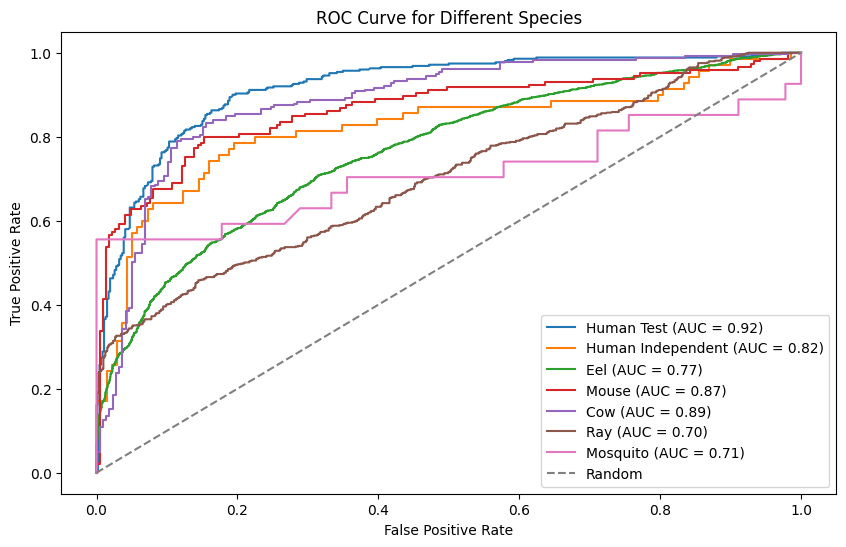

Evaluation for Human Test dataset:
Accuracy: 0.8480
Precision: 0.8304
Recall: 0.8114
F1 Score: 0.8208
MCC: 0.6891
Cohen's Kappa: 0.6889
Predicted Positives: 342.0000
Predicted Negatives: 474.0000


Evaluation for Human Independent dataset:
Accuracy: 0.8221
Precision: 0.8000
Recall: 0.6286
F1 Score: 0.7040
MCC: 0.5881
Cohen's Kappa: 0.5795
Predicted Positives: 55.0000
Predicted Negatives: 153.0000


Evaluation for Eel dataset:
Accuracy: 0.7258
Precision: 0.6727
Recall: 0.5485
F1 Score: 0.6043
MCC: 0.4026
Cohen's Kappa: 0.3978
Predicted Positives: 1699.0000
Predicted Negatives: 3760.0000


Evaluation for Mouse dataset:
Accuracy: 0.8261
Precision: 0.7793
Recall: 0.7793
F1 Score: 0.7793
MCC: 0.6358
Cohen's Kappa: 0.6358
Predicted Positives: 145.0000
Predicted Negatives: 223.0000


Evaluation for Cow dataset:
Accuracy: 0.8315
Precision: 0.8375
Recall: 0.8410
F1 Score: 0.8392
MCC: 0.6622
Cohen's Kappa: 0.6622
Predicted Positives: 240.0000
Predicted Negatives: 217.0000


Evaluation for Ray da

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming you have a dictionary of datasets
datasets = {
    'Human Test':test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Evaluate and plot ROC curve for each dataset
for species, data in datasets.items():
    scaler = StandardScaler()

    # Assuming data.X is a 2D array (matrix)
    X = data.X
    y = data.y

    # Get predicted probabilities for each class
    y_probs = best_pipeline.predict_proba(X)

    # Extract probabilities for each class
    y_prob_negative = y_probs[:, 0]  # Probability for the negative class
    y_prob_positive = y_probs[:, 1]  # Probability for the positive class

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y, y_prob_positive)
    roc_auc = auc(fpr, tpr)

    # Evaluate the model
    y_pred = best_pipeline.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    cohen_kappa = cohen_kappa_score(y, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)

    # Include predicted positives and negatives
    predicted_positives = sum(y_pred == 1)
    predicted_negatives = sum(y_pred == 0)

    # Store the evaluation metrics in the dictionary
    evaluation_metrics[species] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        "Cohen's Kappa": cohen_kappa,
        'Predicted Positives': predicted_positives,
        'Predicted Negatives': predicted_negatives
    }

    # Store the predictions, true labels, and probabilities in a DataFrame
    df_predictions_species = pd.DataFrame({
        'True_Labels': y.flatten(),
        'Predictions': y_pred.flatten(),
        'Probabilities_Negative': y_prob_negative.flatten(),
        'Probabilities_Positive': y_prob_positive.flatten()
    })

    # Reset the index to start from 0
    df_predictions_species.reset_index(drop=True, inplace=True)

    # Save the DataFrame to an Excel file
    df_predictions_species.to_excel(f'{species}_tpot_predictions_data.xlsx', index_label='Index')

    # Plot the ROC curve for each species
    plt.plot(fpr, tpr, label=f'{species} (AUC = {roc_auc:.2f})')

    # Display Confusion Matrix
    print(f"Confusion Matrix for {species} dataset:")
    print(cm)

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Different Species')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Display or analyze the stored evaluation metrics
for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Create a DataFrame from the evaluation_metrics dictionary
df_metrics = pd.DataFrame(evaluation_metrics).transpose()

# Save the DataFrames to Excel files
df_metrics.to_excel('evaluation_metrics_tpot.xlsx', index_label='Species')


### Evaulation of cross species dataset on aggregrate modeling's best model

Confusion Matrix for Human Test dataset:
[[398  68]
 [ 49 301]]
Confusion Matrix for Human Independent dataset:
[[111  27]
 [ 19  51]]
Confusion Matrix for Eel dataset:
[[2645  730]
 [ 833 1251]]
Confusion Matrix for Mouse dataset:
[[187  36]
 [ 34 111]]
Confusion Matrix for Cow dataset:
[[147  71]
 [ 44 195]]
Confusion Matrix for Ray dataset:
[[475 244]
 [306 381]]
Confusion Matrix for Mosquito dataset:
[[22 23]
 [15 12]]


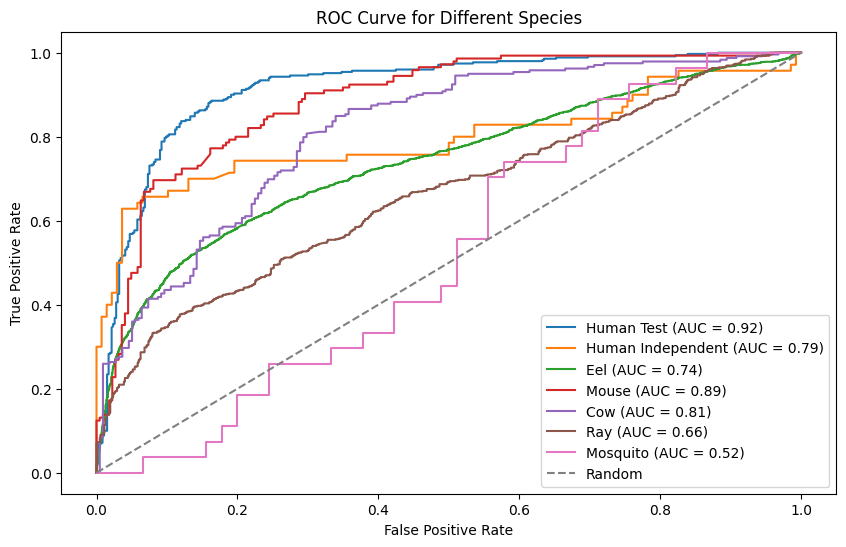

Evaluation for Human Test dataset:
Accuracy: 0.8566
Precision: 0.8157
Recall: 0.8600
F1 Score: 0.8373
MCC: 0.7101
Cohen's Kappa: 0.7093
Predicted Positives: 369.0000
Predicted Negatives: 447.0000


Evaluation for Human Independent dataset:
Accuracy: 0.7788
Precision: 0.6538
Recall: 0.7286
F1 Score: 0.6892
MCC: 0.5202
Cohen's Kappa: 0.5183
Predicted Positives: 78.0000
Predicted Negatives: 130.0000


Evaluation for Eel dataset:
Accuracy: 0.7137
Precision: 0.6315
Recall: 0.6003
F1 Score: 0.6155
MCC: 0.3880
Cohen's Kappa: 0.3877
Predicted Positives: 1981.0000
Predicted Negatives: 3478.0000


Evaluation for Mouse dataset:
Accuracy: 0.8098
Precision: 0.7551
Recall: 0.7655
F1 Score: 0.7603
MCC: 0.6027
Cohen's Kappa: 0.6026
Predicted Positives: 147.0000
Predicted Negatives: 221.0000


Evaluation for Cow dataset:
Accuracy: 0.7484
Precision: 0.7331
Recall: 0.8159
F1 Score: 0.7723
MCC: 0.4964
Cohen's Kappa: 0.4929
Predicted Positives: 266.0000
Predicted Negatives: 191.0000


Evaluation for Ray da

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming you have a dictionary of datasets
datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Evaluate and plot ROC curve for each dataset
for species, data in datasets.items():
    scaler = StandardScaler()

    # Assuming data.X is a 2D array (matrix)
    X = scaler.fit_transform(data.X)
    y = data.y

    # Get predicted probabilities for each class
    y_probs = best_single_model.predict_proba(X)

    # Extract probabilities for each class
    y_prob_negative = y_probs[:, 0]  # Probability for the negative class
    y_prob_positive = y_probs[:, 1]  # Probability for the positive class

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y, y_prob_positive)
    roc_auc = auc(fpr, tpr)

    # Evaluate the model
    y_pred = best_single_model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    cohen_kappa = cohen_kappa_score(y, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)

    # Include predicted positives and negatives
    predicted_positives = sum(y_pred == 1)
    predicted_negatives = sum(y_pred == 0)

    # Store the evaluation metrics in the dictionary
    evaluation_metrics[species] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        "Cohen's Kappa": cohen_kappa,
        'Predicted Positives': predicted_positives,
        'Predicted Negatives': predicted_negatives
    }

    # Store the predictions, true labels, and probabilities in a DataFrame
    df_predictions_species = pd.DataFrame({
        'True_Labels': y.flatten(),
        'Predictions': y_pred.flatten(),
        'Probabilities_Negative': y_prob_negative.flatten(),
        'Probabilities_Positive': y_prob_positive.flatten()
    })

    # Reset the index to start from 0
    df_predictions_species.reset_index(drop=True, inplace=True)

    # Save the DataFrame to an Excel file
    df_predictions_species.to_excel(f'{species}_optimized_predictions_data.xlsx', index_label='Index')

    # Plot the ROC curve for each species
    plt.plot(fpr, tpr, label=f'{species} (AUC = {roc_auc:.2f})')

    # Display Confusion Matrix
    print(f"Confusion Matrix for {species} dataset:")
    print(cm)

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Different Species')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Display or analyze the stored evaluation metrics
for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Create a DataFrame from the evaluation_metrics dictionary
df_metrics = pd.DataFrame(evaluation_metrics).transpose()

# Save the DataFrames to Excel files
df_metrics.to_excel('evaluation_metrics_optimized.xlsx', index_label='Species')


In [ ]:
best_single_model

SVC(C=10, probability=True)

In [ ]:
best_pipeline

Pipeline(steps=[('extratreesclassifier',
                 ExtraTreesClassifier(criterion='entropy', max_features=0.8,
                                      min_samples_leaf=4, min_samples_split=9,
                                      random_state=42))])

In [ ]:
joblib.dump(best_pipeline, 'bestPipeline_tpot_mol2vec_classification.pkl')


['bestPipeline_tpot_mol2vec_classification.pkl']

In [ ]:
joblib.dump(best_single_model, 'bestModel_aggregrate_mol2vec_classification.pkl')


['bestModel_aggregrate_mol2vec_classification.pkl']

## Conclusion

The best models identified through autoML TPOT modeling and aggregate modeling are as follows: TPOT selected ExtraTreesClassifier with parameters (bootstrap=False, criterion=entropy, max_features=0.8, min_samples_leaf=4, min_samples_split=9, n_estimators=100) for its top performer. For aggregate modeling, SVM with parameters (C=10, kernel='rbf') was found to be the most effective.

In cross-species data analysis, TPOT's best pipeline slightly outperformed the top model identified in aggregate modeling.

## References

* Jaeger, S., Fulle, S., & Turk, S. (2018). Mol2vec: Unsupervised Machine Learning Approach with Chemical Intuition. Journal of Chemical Information and Modeling, 58(1), 27–35. https://doi.org/10.1021/acs.jcim.7b00616
* https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html
*Ramsundar, B., Eastman, P., Walters, P., Pande, V., Leswing, K., & Wu, Z. (2019). Deep Learning for the Life Sciences. O’Reilly Media. https://www.amazon.com/Deep-Learning-Life-Sciences-Microscopy/dp/1492039837
*   Vignaux, P. A., Lane, T. R., Urbina, F., Gerlach, J., Puhl, A. C., Snyder, S. H., & Ekins, S. (2023). Validation of Acetylcholinesterase Inhibition Machine Learning Models for Multiple Species. Chemical Research in Toxicology, 36(2), 188–201. https://doi.org/10.1021/acs.chemrestox.2c00283